## Exercise 3.1

Run and listen to the examples in chap03.ipynb.  In the leakage example, try replacing the Hamming window with one of the other windows provided by NumPy, and see what effect they have on leakage.

See http://docs.scipy.org/doc/numpy/reference/routines.window.html

In [51]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    from urllib.request import urlretrieve

    urlretrieve("https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py", "thinkdsp.py")

In [52]:
import numpy as np

from thinkdsp import SinSignal, decorate, read_wave

signal = SinSignal(freq=440)
duration = signal.period * 30.25
wave = signal.make_wave(duration)
spectrum = wave.make_spectrum()

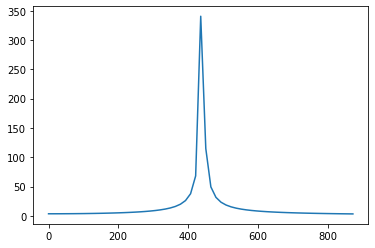

In [53]:
spectrum.plot(high=880)

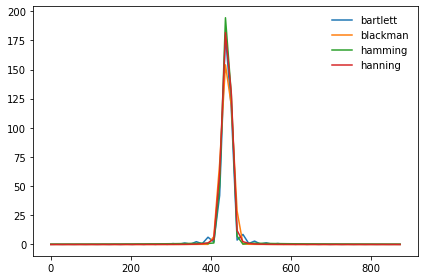

In [54]:
for window_func in [np.bartlett, np.blackman, np.hamming, np.hanning]:
    wave = signal.make_wave(duration)
    wave.ys *= window_func(len(wave.ys))

    spectrum = wave.make_spectrum()
    spectrum.plot(high=880, label=window_func.__name__)
decorate()

## Exercise 3.2

Write a class called `SawtoothChirp` that extends `Chirp` and overrides evaluate to generate a sawtooth waveform with frequency that increases (or decreases) linearly.

In [55]:
from thinkdsp import Chirp
from thinkdsp import normalize, unbias

PI2 = 2 * np.pi


class SawtoothChirp(Chirp):
    def evaluate(self, ts):
        freqs = np.linspace(self.start, self.end, len(ts))
        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        cycles = phases / PI2
        frac, _ = np.modf(cycles)
        ys = normalize(unbias(frac), self.amp)
        return ys

In [56]:
signal = SawtoothChirp(start=220, end=880)
wave = signal.make_wave(duration=1, framerate=4000)
wave.apodize()
wave.make_audio()

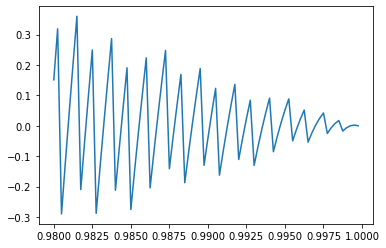

In [57]:
wave.segment(start=1 - 0.02, duration=0.02).plot()

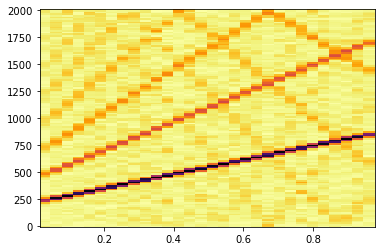

In [58]:
sp = wave.make_spectrogram(256)
sp.plot()

## Exercise 3.3

Make a sawtooth chirp that sweeps from 2500 to 3000 Hz, then
make a wave with duration 1 and framerate 20 kHz.  Draw a sketch of
what you think the spectrum will look like.  Then plot the
spectrum and see if you got it right.

In [59]:
signal = SawtoothChirp(start=2500, end=3000)
wave = signal.make_wave(duration=1, framerate=20000)
wave.make_audio()

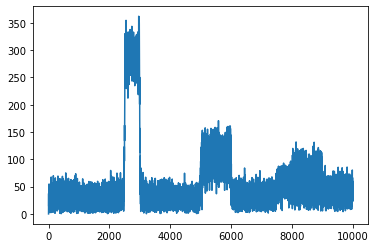

In [60]:
wave.make_spectrum().plot()

## Exercise 3.4

In musical terminology, a “glissando” is a note that slides from one pitch to another, so it is similar to a chirp. Find or make a recording of a glissando and plot its spectrogram.

One suggestion: George Gershwin's *Rhapsody in Blue* starts with a famous clarinet glissando; you can download a recording from http://archive.org/details/rhapblue11924.

In [61]:
wave = read_wave('Sounds/rhapblue11924.wav').segment(start=7.75, duration=1.5)
wave.make_audio()

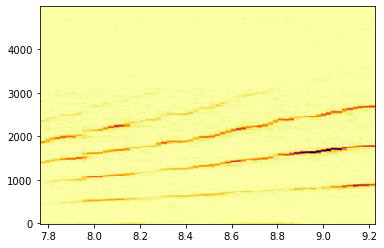

In [62]:
wave.make_spectrogram(512).plot(high=5000)

## Exercise 5

A trombone player can play a glissando by extending the trombone slide while blowing continuously. As the slide extends, the total length of the tube gets longer, and the resulting pitch is inversely proportional to length.
Assuming that the player moves the slide at a constant speed, how
does frequency vary with time?

Write a class called `TromboneGliss` that extends `Chirp` and
provides `evaluate`.  Make a wave that simulates a trombone
glissando from F3 down to C3 and back up to F3.  C3 is 262 Hz; F3 is
349 Hz.

Plot a spectrogram of the resulting wave.  Is a trombone glissando
more like a linear or exponential chirp?

In [63]:
class TromboneGliss(Chirp):
    def evaluate(self, ts):
        l1, l2 = 1.0 / self.start, 1.0 / self.end
        lengths = np.linspace(l1, l2, len(ts))
        freqs = 1 / lengths

        dts = np.diff(ts, prepend=0)
        dphis = PI2 * freqs * dts
        phases = np.cumsum(dphis)
        ys = self.amp * np.cos(phases)
        return ys

In [64]:
low = 262
high = 349
signal = TromboneGliss(high, low)
wave1 = signal.make_wave(duration=1)
wave1.apodize()
wave1.make_audio()

In [65]:
signal = TromboneGliss(low, high)
wave2 = signal.make_wave(duration=1)
wave2.apodize()
wave2.make_audio()

In [66]:
wave = wave1 | wave2
wave.make_audio()

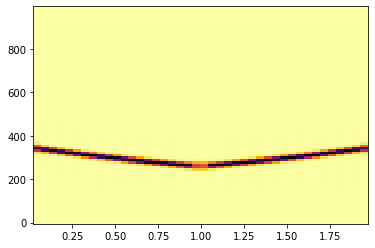

In [67]:
sp = wave.make_spectrogram(1024)
sp.plot(high=1000)

## Exercise 6

Make or find a recording of a series of vowel sounds and look at the
spectrogram.  Can you identify different vowels?

In [68]:
wave = read_wave('Sounds/87778__marcgascon7__vocals.wav')
wave.make_audio()

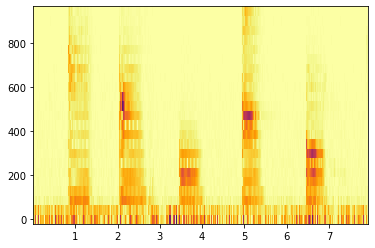

In [69]:
wave.make_spectrogram(1024).plot(high=1000)
